### Import des différentes bibliothéques et des données

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np

In [36]:
x_train = pd.read_csv('/Users/guimb/Documents/Data Scientest/rakuten/data/X_train.csv', sep=',', index_col='Unnamed: 0')
y_train = pd.read_csv('/Users/guimb/Documents/Data Scientest/rakuten/data/Y_train.csv', sep=',', index_col='Unnamed: 0')
df = x_train.join(y_train)
img_sizes_path = '/Users/guimb/Documents/Data Scientest/rakuten/data/images/img_train_sizes.joblib'
sizes = joblib.load(img_sizes_path)
df.head()


,designation,description,productid,imageid,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design,NaN,3804725264,1263597046,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris - Jacques Barrere - Francois Perrier - La Reforme Des Ventes Aux Encheres Publiques - Le Sna Fete Ses Cent Ans.,NaN,436067568,1008141237,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo Wii U - Speedlink Pilot Style,"PILOT STYLE Touch Pen de marque Speedlink est 1 stylet ergonomique pour GamePad Nintendo Wii U.<br> Pour un confort optimal et une précision maximale sur le GamePad de la Wii U: ce grand stylet hautement ergonomique est non seulement parfaitement adapté à votre main mais aussi très élégant.<br> Il est livré avec un support qui se fixe sans adhésif à l'arrière du GamePad<br> <br> Caractéristiques:<br> Modèle: Speedlink PILOT STYLE Touch Pen<br> Couleur: Bleu<br> Ref. Fabricant: SL-3468-BE<br> Compatibilité: GamePad Nintendo Wii U<br> Forme particulièrement ergonomique excellente tenue en main<br> Pointe à revêtement longue durée conçue pour ne pas abîmer l'écran tactile<br> En bonus : Support inclu pour GamePad<br> <span class=""vga_style2""><b></b><br>",201115110,938777978,50
3,Peluche Donald - Europe - Disneyland 2000 (Marionnette À Doigt),NaN,50418756,457047496,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'arranger pour en &ecirc;tre le vainqueur incontest&eacute;. Mais Sophie s'en m&ecirc;le et chambarde tous ses plans...,278535884,1077757786,2705


### Analyse du dataframe

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
 4   prdtypecode  84916 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 5.9+ MB


In [12]:
df.isna().sum(axis = 0)

designation        0
description    29800
productid          0
imageid            0
prdtypecode        0
dtype: int64

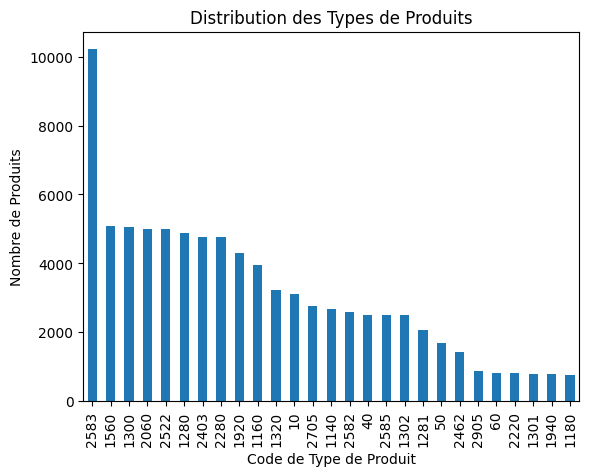

In [13]:
type_distribution = df['prdtypecode'].value_counts()
type_distribution.plot(kind='bar')
plt.title('Distribution des Types de Produits')
plt.xlabel('Code de Type de Produit')
plt.ylabel('Nombre de Produits')
plt.show()

### Analyse de la longueur des designations et des descriptions 

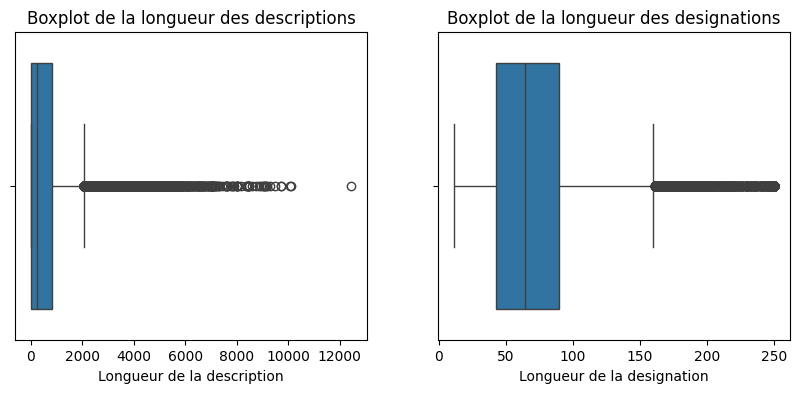

Statistiques descriptives de la longueur des descriptions :
 count    84916.000000
mean       524.555926
std        754.893905
min          0.000000
25%          0.000000
50%        231.000000
75%        823.000000
max      12451.000000
Name: description_length, dtype: float64
Statistiques descriptives de la longueur des designations :
 count    84916.000000
mean        70.163303
std         36.793383
min         11.000000
25%         43.000000
50%         64.000000
75%         90.000000
max        250.000000
Name: designation_length, dtype: float64


In [14]:
df['description'].fillna('', inplace=True)
df['description_length'] = df['description'].apply(len)
statistiques_description = df['description_length'].describe()

plt.figure(figsize=(10, 4))
plt.subplot(121)
sns.boxplot(x=df['description_length'])
plt.title('Boxplot de la longueur des descriptions')
plt.xlabel('Longueur de la description')

df['designation'].fillna('', inplace=True)
df['designation_length'] = df['designation'].apply(len)
statistiques_designation = df['designation_length'].describe()

plt.subplot(122);
sns.boxplot(x=df['designation_length'])
plt.title('Boxplot de la longueur des designations')
plt.xlabel('Longueur de la designation')
plt.show()


print("Statistiques descriptives de la longueur des descriptions :\n", statistiques_description)
print("Statistiques descriptives de la longueur des designations :\n", statistiques_designation)

### Analyse de la classe description

In [15]:
# Regroupement des descriptions identiques"
grouped_descriptions = x_train.groupby('description').size().reset_index().rename(columns={0: "taille"})
grouped_descriptions['nombre de mots']=grouped_descriptions['description'].apply(lambda n: len(n.split()))
pd.set_option('display.max_colwidth', None)
g_desc=grouped_descriptions[grouped_descriptions['taille'] >27]
g_desc=g_desc.sort_values(by='taille',ascending=False)


In [16]:
g_desc.head()

,description,taille,nombre de mots
5199,<br>Attention !!! Ce produit est un import si les informations 'langues' et 'sous-titres' n'apparaissent pas sur cette fiche produit c'est que l'éditeur ne nous les a pas fournies. Néanmoins dans la grande majorité de ces cas il n'existe ni langue ni sous titres en français sur ces imports.,252,48
42172,Taille: En format A5 (144 cm x 21 cm) Caractéistique: -Excellente durabilité avec couverture solide design. 96 pages jaune pale (recto et verso) -Texture de papier de haute qualitévous pouvez y érire facilement,232,33
42170,Taille: En format A5 (144 cm x 21 cm) Caracteristique: -Excellente durabilite avec couverture solide design. 96 pages jaune pale (recto et verso) -Texture de papier de haute qualite: ecrire facilement sur et assez epaisse.,189,35
42167,Taille: En format A5 (144 cm x 21 cm) Caract?istique: -Excellente durabilit?avec couverture solide design. 96 pages jaune pale (recto et verso) -Texture de papier de haute qualit? ?rire facilement sur et assez ?aisse.,162,34
42173,Taille: En format A5 (144 cm x 21 cm) Caractéristique: -Excellente durabilit?avec couverture solide design. 96 pages jaune pale (recto et verso) -Texture de papier de haute qualit? écrire facilement sur et assez épaisse.,89,34


/var/folders/8_/8873knm10xv6c3y4dnnpr5dr0000gn/T/ipykernel_76722/1310996320.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=60)
/var/folders/8_/8873knm10xv6c3y4dnnpr5dr0000gn/T/ipykernel_76722/1310996320.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=60)


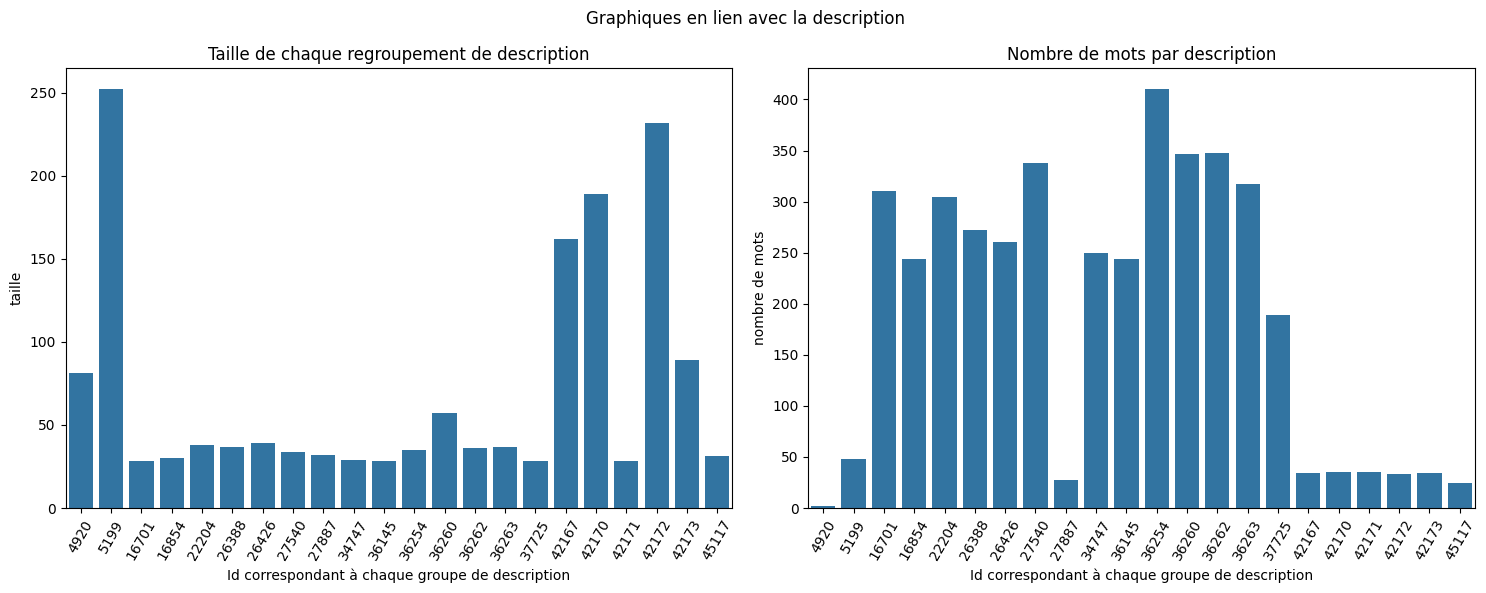

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Graphique 1
sns.barplot(x=g_desc.index, y='taille', data=g_desc, ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=60)
axs[0].set_xlabel('Id correspondant à chaque groupe de description')
axs[0].set_title('Taille de chaque regroupement de description')

# Graphique 2
sns.barplot(x=g_desc.index, y='nombre de mots', data=g_desc, ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=60)
axs[1].set_xlabel('Id correspondant à chaque groupe de description')
axs[1].set_title('Nombre de mots par description')

# Titre global
fig.suptitle("Graphiques en lien avec la description")

# Ajuster la disposition pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()

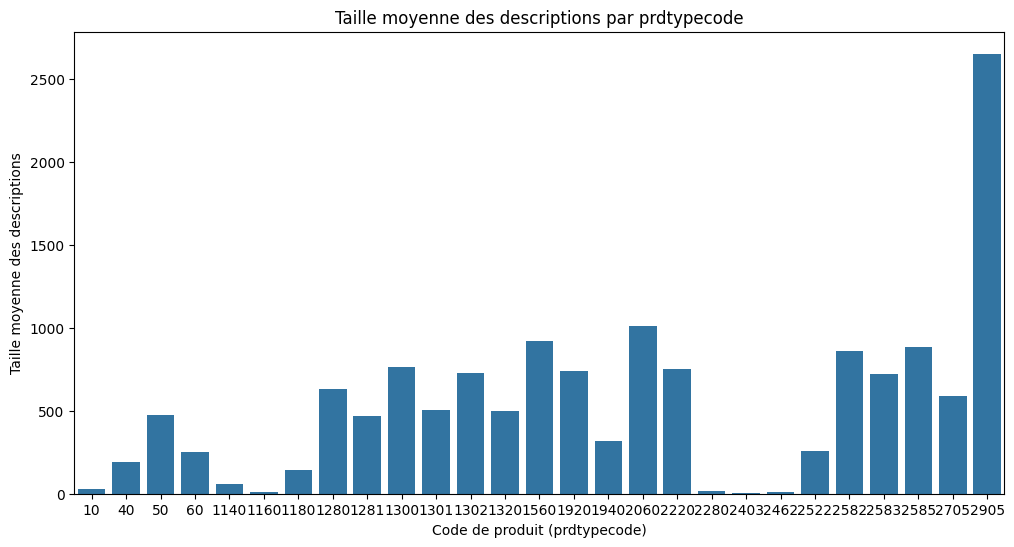

In [18]:
df['description_length'] = df['description'].apply(len)

groupe_par_prdtype_description = df.groupby('prdtypecode')['description_length'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='prdtypecode', y='description_length', data=groupe_par_prdtype_description)
plt.xlabel('Code de produit (prdtypecode)')
plt.ylabel('Taille moyenne des descriptions')
plt.title('Taille moyenne des descriptions par prdtypecode')
plt.show()


### Analyse de la classe designation

In [24]:
# Regroupement des designations identiques"
grouped_designation = x_train.groupby('description').size().reset_index().rename(columns={0: "taille"})
grouped_designation['nombre de mots']=grouped_designation['description'].apply(lambda n: len(n.split()))
pd.set_option('display.max_colwidth', None)
g_des=grouped_designation[grouped_descriptions['taille'] >27]
g_des=g_des.sort_values(by='taille',ascending=False)


In [26]:
g_des.head()


,description,taille,nombre de mots
5199,<br>Attention !!! Ce produit est un import si les informations 'langues' et 'sous-titres' n'apparaissent pas sur cette fiche produit c'est que l'éditeur ne nous les a pas fournies. Néanmoins dans la grande majorité de ces cas il n'existe ni langue ni sous titres en français sur ces imports.,252,48
42172,Taille: En format A5 (144 cm x 21 cm) Caractéistique: -Excellente durabilité avec couverture solide design. 96 pages jaune pale (recto et verso) -Texture de papier de haute qualitévous pouvez y érire facilement,232,33
42170,Taille: En format A5 (144 cm x 21 cm) Caracteristique: -Excellente durabilite avec couverture solide design. 96 pages jaune pale (recto et verso) -Texture de papier de haute qualite: ecrire facilement sur et assez epaisse.,189,35
42167,Taille: En format A5 (144 cm x 21 cm) Caract?istique: -Excellente durabilit?avec couverture solide design. 96 pages jaune pale (recto et verso) -Texture de papier de haute qualit? ?rire facilement sur et assez ?aisse.,162,34
42173,Taille: En format A5 (144 cm x 21 cm) Caractéristique: -Excellente durabilit?avec couverture solide design. 96 pages jaune pale (recto et verso) -Texture de papier de haute qualit? écrire facilement sur et assez épaisse.,89,34


/var/folders/8_/8873knm10xv6c3y4dnnpr5dr0000gn/T/ipykernel_76722/3296410883.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=60)
/var/folders/8_/8873knm10xv6c3y4dnnpr5dr0000gn/T/ipykernel_76722/3296410883.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=60)


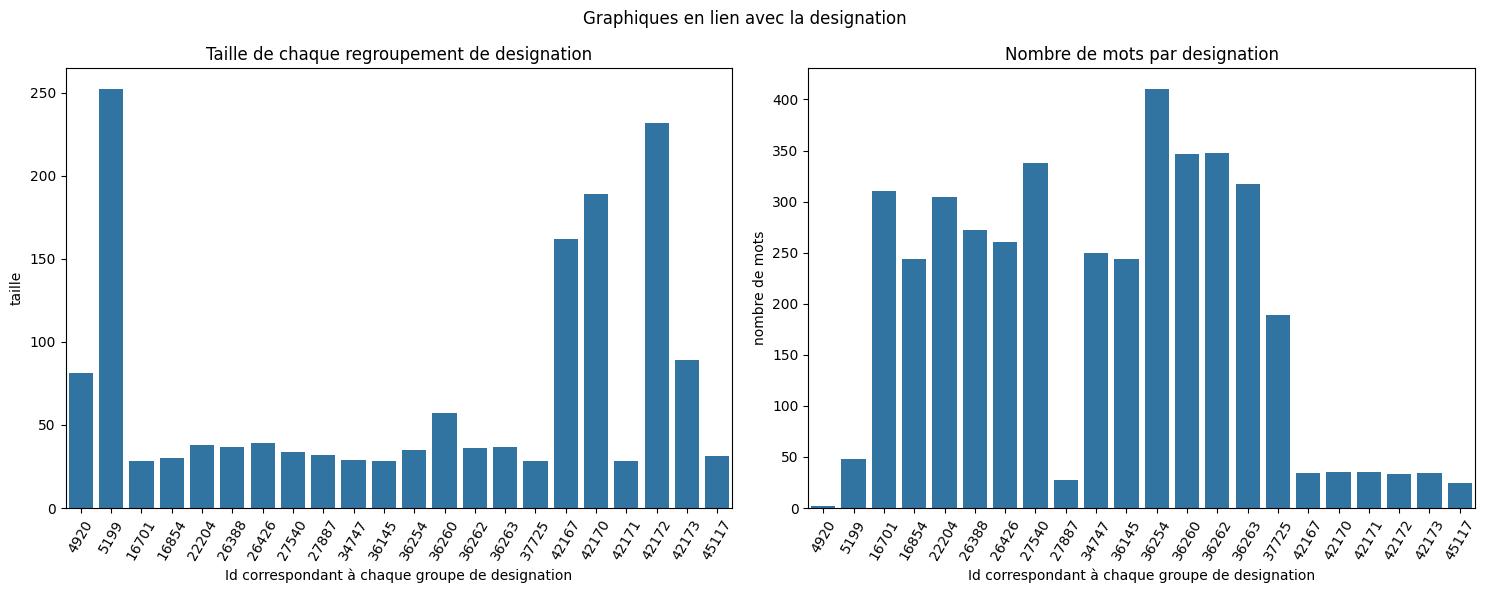

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Graphique 1
sns.barplot(x=g_des.index, y='taille', data=g_des, ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=60)
axs[0].set_xlabel('Id correspondant à chaque groupe de designation')
axs[0].set_title('Taille de chaque regroupement de designation')

# Graphique 2
sns.barplot(x=g_des.index, y='nombre de mots', data=g_des, ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=60)
axs[1].set_xlabel('Id correspondant à chaque groupe de designation')
axs[1].set_title('Nombre de mots par designation')

# Titre global
fig.suptitle("Graphiques en lien avec la designation")

# Ajuster la disposition pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()

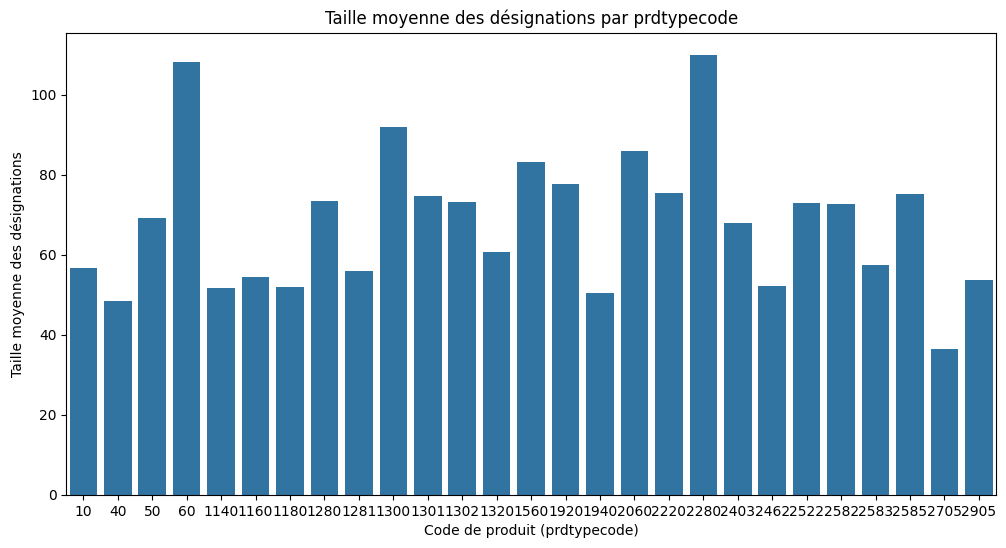

In [30]:
df['designation_length'] = df['designation'].apply(len)
groupe_par_prdtype_designation = df.groupby('prdtypecode')['designation_length'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='prdtypecode', y='designation_length', data=groupe_par_prdtype_designation)
plt.xlabel('Code de produit (prdtypecode)')
plt.ylabel('Taille moyenne des désignations')
plt.title('Taille moyenne des désignations par prdtypecode')
plt.show()


### Analyse des images

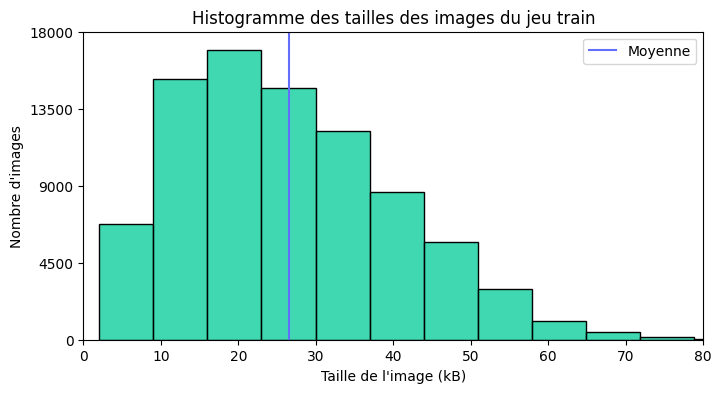

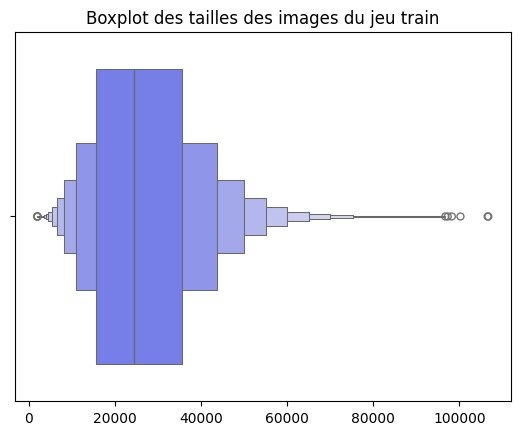

In [39]:
plt.figure(figsize=(8,4))
sns.histplot(sizes/1000, bins=15, color="#00cc96")
plt.plot((sizes.mean()/1000, sizes.mean()/1000), (0, 20000), color="#636efa", label="Moyenne")
plt.ylim(top=18000)
plt.xlim((0,80))
plt.yticks(np.linspace(0,18000,5))
plt.xlabel("Taille de l'image (kB)")
plt.ylabel("Nombre d'images")
plt.title("Histogramme des tailles des images du jeu train")
plt.legend();

# Boxplot
plt.figure()
sns.boxenplot(sizes, orient="h", color="#636efa")
plt.title("Boxplot des tailles des images du jeu train");